# Nengo Example: Two Neurons

This demo shows how to construct and manipulate a complementary pair of neurons.

These are leaky integrate-and-fire (LIF) neurons. The neuron tuning properties have been selected so there is one ‘on’ and one ‘off’ neuron.

One neuron will increase for positive input, and the other will decrease. This can be thought of as the simplest population that is able to give a reasonable representation of a scalar value.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nengo
%load_ext nengo.ipynb

<IPython.core.display.Javascript object>

## Step 1: Create the neurons 

In [2]:
from nengo.dists import Uniform

model = nengo.Network(label='Two Neurons')
with model:
    neurons = nengo.Ensemble(2, dimensions=1,  # Representing a scalar
                             intercepts=Uniform(-.5, -.5),  # Set the intercepts at .5
                             max_rates=Uniform(100,100),  # Set the max firing rate at 100hz
                             encoders=[[1],[-1]])  # One 'on' and one 'off' neuron

## Step 2: Create input for the model

Create an input node generating a sine wave.

In [3]:
with model:
    sin = nengo.Node(lambda t: np.sin(8 * t))

## Step 3: Connect the network elements

In [4]:
with model:
    nengo.Connection(sin, neurons, synapse=0.01)

## Step 4: Probe outputs

Anything that is probed will collect the data it produces over time, allowing us to analyze and visualize it later.

In [5]:
with model:
    sin_probe = nengo.Probe(sin)  # The original input
    spikes = nengo.Probe(neurons.neurons)  # Raw spikes from each neuron
    voltage = nengo.Probe(neurons.neurons, 'voltage')  # Subthreshold soma voltages of the neurons
    filtered = nengo.Probe(neurons, synapse=0.01)  # Spikes filtered by a 10ms post-synaptic filter

## Step 5: Run the model

In [6]:
with nengo.Simulator(model) as sim:  # Create a simulator
    sim.run(1)  # Run it for 1 second

## Step 6: Plot the results

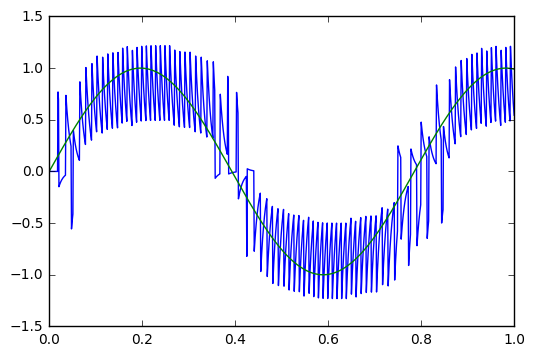

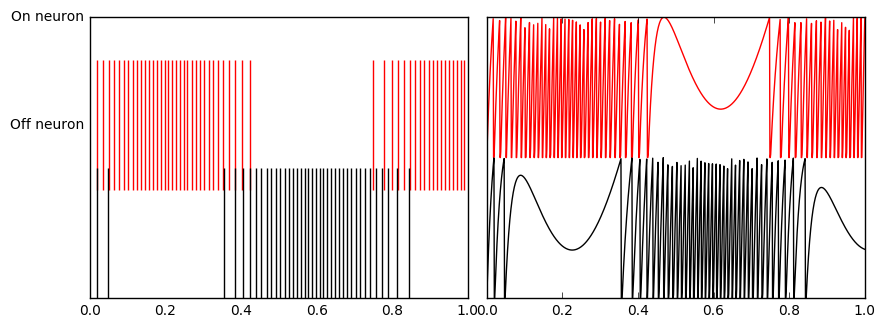

In [7]:
# Plot the decoded output of the ensemble
plt.plot(sim.trange(), sim.data[filtered])
plt.plot(sim.trange(), sim.data[sin_probe])
plt.xlim(0, 1)

# Plot the spiking output of the ensemble
from nengo.utils.matplotlib import rasterplot
plt.figure(figsize=(10, 8))
plt.subplot(221)
rasterplot(sim.trange(), sim.data[spikes], colors=[(1, 0, 0), (0, 0, 0)])
plt.xlim(0, 1)
plt.yticks((0, 1), ("On neuron", "Off neuron"))

# Plot the soma voltages of the neurons
plt.subplot(222)
plt.plot(sim.trange(), sim.data[voltage][:, 0] + 1, 'r')
plt.plot(sim.trange(), sim.data[voltage][:, 1], 'k')
plt.yticks(())
plt.axis([0, 1, 0, 2])
plt.subplots_adjust(wspace=0.05);

The top graph shows that the input signal in green and the filtered output spikes from the two neurons population in blue.  The spikes (that are filtered) from the 'on' and 'off' neurons are shown in the bottom graph on the left.  On the right are the subthreshold voltages for the neurons.